<a href="https://colab.research.google.com/github/LucianoRodriguez0764/ipadapter_faceid_colab/blob/main/Ipadapter_faceID_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing dependencies and download the IP-Adapter-FaceID-Plus-v2 model

In [1]:
!pip install insightface
!pip install onnxruntime
!pip install diffusers
!pip install git+https://github.com/tencent-ailab/IP-Adapter.git
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 78.6 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055392 sha256=0c24dbe0ce0f63e35bef19e5a940d7c0d4a78c2326c4764353772db6651b901b
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.1 MB/s eta 0:00:00
  Cloning https://github.com/tencent-ailab/IP-Adapter.git to /tmp/pip-req-build-tak_bwlk
  Running command git clone --filter=blob:none --quiet https://gith

In [2]:
!wget -O ip-adapter-faceid-plusv2_sd15.bin https://huggingface.co/h94/IP-Adapter-FaceID/resolve/main/ip-adapter-faceid-plusv2_sd15.bin

--2024-11-26 13:49:19--  https://huggingface.co/h94/IP-Adapter-FaceID/resolve/main/ip-adapter-faceid-plusv2_sd15.bin
Resolving huggingface.co (huggingface.co)... 13.35.210.77, 13.35.210.66, 13.35.210.61, ...
Connecting to huggingface.co (huggingface.co)|13.35.210.77|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/36/ca/36ca54ff1895000df817b45a5ae71fccd14170b0843d8adc2ba7944d9ac903e9/26d0d86a1d60d6cc811d3b8862178b461e1eeb651e6fe2b72ba17aa95411e313?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27ip-adapter-faceid-plusv2_sd15.bin%3B+filename%3D%22ip-adapter-faceid-plusv2_sd15.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1732885920&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMjg4NTkyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzM2L2NhLzM2Y2E1NGZmMTg5NTAwMGRmODE3YjQ1YTVhZTcxZmNjZDE0MTcwYjA4NDNkOGFkYzJiYTc5NDRkOWFjOTAzZTkvMjZkM

# Load the models to the pipeline

In [3]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler, AutoencoderKL
from PIL import Image as PILImage

v2 = True
base_model_path = "SG161222/Realistic_Vision_V6.0_B1_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K"
ip_ckpt = "ip-adapter-faceid-plus_sd15.bin" if not v2 else "ip-adapter-faceid-plusv2_sd15.bin"
device = "cuda"

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network beha

# Load Face embeds and FaceID Image

In [6]:
image_path = "images/embeds"
image_path_face = "images/face"


# Create if they dont exist
os.makedirs(image_path, exist_ok=True)
# Create if they dont exist
os.makedirs(image_path_face, exist_ok=True)

In [9]:
import cv2
from insightface.app import FaceAnalysis
from insightface.utils import face_align
import torch
import glob, os
from PIL import Image as PILImage

app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

app_lower = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app_lower.prepare(ctx_id=0, det_size=(320, 320))

imgs = glob.glob(os.path.join(image_path, '*.*'))
#imgs += glob.glob(os.path.join('images/face_2', '*.*'))

# Collect all embeddings
embeddings = []

for i in range(len(imgs)):
    print(imgs[i])
    image = cv2.imread(imgs[i])
    faces = app.get(image)

    # Check if a face is detected
    if faces:
      faceid_embed = torch.from_numpy(faces[0].normed_embedding).unsqueeze(0)
      embeddings.append(faceid_embed)
    else:
      print("face not detected with 640x640, trying with 320x320")
      faces = app_lower.get(image)
      if faces:
        faceid_embed = torch.from_numpy(faces[0].normed_embedding).unsqueeze(0)
        embeddings.append(faceid_embed)
      else:
        print("face not detected.")

# Calculate the average embedding for the face ID
use_image_weights = False
weights = []
weights = [elem/sum(weights) for elem in weights] # normalization

if embeddings:
    ### weights
    if use_image_weights:
      total = torch.zeros_like(embeddings[0])
      for i in range(len(embeddings)):
          if len(weights)==len(embeddings):
              total.add_(embeddings[i]*weights[i])
          else:
              total.add_(embeddings[i]*(1/len(embeddings)))
      faceid_embeds_avg = total / len(embeddings[i])
    ###  mean weights
    else:
      faceid_embeds = torch.mean(torch.stack(embeddings), dim=0)

    print("Collected face ID embedding")
else:
    print("No faces detected in the images provided.")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Applied prov

In [17]:
imgs_2 = glob.glob(os.path.join(image_path_face, '*.*'))
image1 = cv2.imread(imgs_2[0])
faces1 = app.get(image1)
if faces1:
  print("face image detected.")
else:
  print("face not detected with 640x640, trying with 320x320")
  faces1 = app_lower.get(image)
  if faces1:
    print("face image detected.")
  else:
    print("face not detected.")

face_image = face_align.norm_crop(image1, landmark=faces1[0].kps, image_size=224)

face image detected.


array([[[ 77,  73,  79],
        [ 78,  74,  80],
        [ 81,  77,  83],
        ...,
        [ 79,  75,  81],
        [ 81,  77,  83],
        [ 79,  75,  81]],

       [[ 79,  72,  79],
        [ 77,  73,  79],
        [ 78,  74,  80],
        ...,
        [ 78,  74,  80],
        [ 79,  75,  81],
        [ 79,  75,  81]],

       [[ 80,  73,  80],
        [ 76,  72,  78],
        [ 79,  75,  81],
        ...,
        [ 78,  74,  80],
        [ 79,  75,  81],
        [ 78,  74,  80]],

       ...,

       [[ 38,  52,  71],
        [ 33,  47,  66],
        [ 19,  33,  52],
        ...,
        [ 39,  63,  95],
        [ 37,  60,  92],
        [ 41,  65,  95]],

       [[ 31,  45,  64],
        [ 29,  43,  62],
        [ 15,  29,  48],
        ...,
        [ 40,  65,  97],
        [ 32,  57,  89],
        [ 41,  64,  96]],

       [[ 29,  43,  62],
        [ 30,  44,  63],
        [ 18,  32,  51],
        ...,
        [ 49,  74, 107],
        [ 34,  59,  92],
        [ 37,  59,  93]]], dtype=uint8)
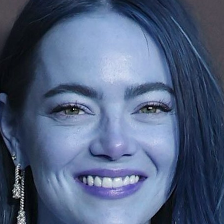

In [18]:
face_image

In [170]:
from ip_adapter.ip_adapter_faceid import IPAdapterFaceIDPlus
import ipywidgets as widgets
from IPython.display import clear_output as clear_output_py
import math

ip_model = IPAdapterFaceIDPlus(pipe, image_encoder_path, ip_ckpt, device)

output_widget = widgets.Output()

def clear_widget_output():
    global output_widget
    output_widget.clear_output()

def display_images(images):
    image_widgets = [widgets.Image(value=img._repr_png_()) for img in images]
    display(widgets.HBox(image_widgets))

def generate_images(clear_output=True):

  global ip_model, num_samples, num_inference_steps, guidance_scale, prompt, negative_prompt, face_image, faceid_embeds, seed, width, height, s_scale, shortcut,x_plot_generation,y_plot_generation,x_plot_parameter,y_plot_parameter,x_plot_values,y_plot_values,xy_different_seeds

  if(clear_output):
    clear_widget_output()


  if x_plot_generation:
    num_samples=1
    if y_plot_generation:
      images_array = []
      for h in range(len(y_plot_values)):
        images = []
        with output_widget:
          if y_plot_parameter in globals():
            globals()[y_plot_parameter] = y_plot_values[h]
            if y_plot_parameter != "face_image" and y_plot_parameter != "faceid_embeds":
              print(y_plot_parameter,"set to:",globals()[y_plot_parameter])
          for i in range(len(x_plot_values)):
            if x_plot_parameter in globals():
              globals()[x_plot_parameter] = x_plot_values[i]
              if x_plot_parameter != "face_image" and x_plot_parameter != "faceid_embeds":
                print(x_plot_parameter,"set to:",globals()[x_plot_parameter])
            if xy_different_seeds and i!=0:
              seed = random.randint(1, 999999999)
            print("Seed: ", seed)
            generated_image = ip_model.generate(
                prompt=prompt+", "+extra_prompt, negative_prompt=negative_prompt, face_image=face_image, faceid_embeds=faceid_embeds, num_samples=num_samples, width=width, height=height, num_inference_steps=num_inference_steps, seed=seed,
                guidance_scale=guidance_scale, shortcut=shortcut, s_scale=s_scale,
            )[0]
            images.append(generated_image)
          images_array.append(images)

      for img in images_array:
        display_images(img)
      return
    else:
      with output_widget:
        images = []
        for i in range(len(x_plot_values)):
          if x_plot_parameter in globals():
            globals()[x_plot_parameter] = x_plot_values[i]
            if x_plot_parameter != "face_image" and x_plot_parameter != "faceid_embeds":
              print(x_plot_parameter,"set to:",globals()[x_plot_parameter])
          if xy_different_seeds and i!=0:
            seed = random.randint(1, 999999999)

          print("Seed: ", seed)
          images.extend(ip_model.generate(
          prompt=prompt+", "+extra_prompt, negative_prompt=negative_prompt, face_image=face_image, faceid_embeds=faceid_embeds, num_samples=num_samples, width=width, height=height, num_inference_steps=num_inference_steps, seed=seed,
          guidance_scale=guidance_scale, shortcut=True, s_scale=s_scale))
  else:

    with output_widget:
      print("Seed: ", seed)
      images = ip_model.generate(
          prompt=prompt+", "+extra_prompt, negative_prompt=negative_prompt, face_image=face_image, faceid_embeds=faceid_embeds, num_samples=num_samples, width=width, height=height, num_inference_steps=num_inference_steps, seed=seed,
          guidance_scale=guidance_scale, shortcut=shortcut, s_scale=s_scale
      )
  with output_widget:
    display_images(images)


/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:208: FutureWarning: `LoRALinearLayer` is deprecated and will be removed in version 1.0.0. Use of `LoRALinearLayer` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRALinearLayer", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/ip_adapter/ip_adapter_faceid.py:319: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly 

In [151]:
import ipywidgets as widgets
from IPython.display import display

slider_style = {'description_width': '200px'}
slider_layout = widgets.Layout(width='500px')

text_input = widgets.Text(placeholder="Add prompts separated by commas",style=slider_style, layout=slider_layout)
add_button = widgets.Button(description="Add tag")


prompt_array = []
neg_prompt_array = []
x_parameter_value_array = []
y_parameter_value_array = []

tags_box = widgets.HBox([])

def add_tag(b):
    text = text_input.value
    tags = text.split(",")

    for i in range(len(tags)):
        tags[i] = tags[i].strip()

    for tag in tags:
      if tag!="":
        tag_wi = widgets.HBox([
            widgets.HTML(value=f"<b>{tag}</b>"),
            widgets.Button(description="x", layout=widgets.Layout(width='30px'))
        ])
        prompt_array.append(tag)

        tags_box.children = list(tags_box.children) + [tag_wi]
        tag_wi.children[1].on_click(lambda b, tag_wi=tag_wi, tag=tag: remove_tag(tag_wi,tag))
    text_input.value = ""

def remove_tag(tag_wi,tag):
    global prompt_array
    tags_box.children = [child for child in tags_box.children if child != tag_wi]
    prompt_array = [x for x in prompt_array if x != tag]

add_button.on_click(add_tag)

######## NEGATIVE PROMPTS ###########

text_input_neg = widgets.Text(placeholder="Add negative prompts separated by commas",style=slider_style, layout=slider_layout)
add_button_neg = widgets.Button(description="Add tag")

tags_box_neg = widgets.HBox([])

def add_tag_neg(b):
    text = text_input_neg.value
    tags = text.split(",")

    for i in range(len(tags)):
        tags[i] = tags[i].strip()

    for tag in tags:
      if tag!="":
        tag_wi = widgets.HBox([
            widgets.HTML(value=f"<b>{tag}</b>"),
            widgets.Button(description="x", layout=widgets.Layout(margin="0px, 0px, 0px, 5px",width='30px'))
        ])
        neg_prompt_array.append(tag)

        tags_box_neg.children = list(tags_box_neg.children) + [tag_wi]
        tag_wi.children[1].on_click(lambda b, tag_wi=tag_wi, tag=tag: remove_tag_neg(tag_wi,tag))
    text_input_neg.value = ""


def remove_tag_neg(tag_wi,tag):
    global neg_prompt_array
    tags_box_neg.children = [child for child in tags_box_neg.children if child != tag_wi]
    neg_prompt_array = [x for x in neg_prompt_array if x != tag]

add_button_neg.on_click(add_tag_neg)


########### x plot generation ###########


text_input_x = widgets.Text(placeholder="X Parameter values", disabled=True)
add_button_x = widgets.Button(description="Add value", disabled=True)

tags_box_x = widgets.HBox([])

def add_tag_x(b):
    text = text_input_x.value
    tags = text.split(",")

    for i in range(len(tags)):
        tags[i] = tags[i].strip()

    for tag in tags:
      if tag!="":
        tag_wi = widgets.HBox([
            widgets.HTML(value=f"<b>{tag}</b>"),
            widgets.Button(description="x", layout=widgets.Layout(width='30px'))
        ])
        x_parameter_value_array.append(tag)
        tags_box_x.children = list(tags_box_x.children) + [tag_wi]
        tag_wi.children[1].on_click(lambda b, tag_wi=tag_wi, tag=tag: remove_tag_x(tag_wi,tag))
    text_input_x.value = ""



def remove_tag_x(tag_wi,tag):
    global x_parameter_value_array
    tags_box_x.children = [child for child in tags_box_x.children if child != tag_wi]

    if x_plot_parameter == "num_inference_steps":
      tag = int(tag)
    elif x_plot_parameter in ["guidance_scale", "s_scale"]:
      tag = float(tag)

    x_parameter_value_array = [x for x in x_parameter_value_array if x != tag]
    print("deleted",tag,x_parameter_value_array)

add_button_x.on_click(add_tag_x)

########### y plot generation ###########


text_input_y = widgets.Text(placeholder="Y Parameter values", disabled=True)
add_button_y = widgets.Button(description="Add value", disabled=True)

tags_box_y = widgets.HBox([])

def add_tag_y(b):
    text = text_input_y.value
    tags = text.split(",")

    for i in range(len(tags)):
        tags[i] = tags[i].strip()

    for tag in tags:
      if tag!="":
        tag_wi = widgets.HBox([
            widgets.HTML(value=f"<b>{tag}</b>"),
            widgets.Button(description="x", layout=widgets.Layout(width='30px'))
        ])
        y_parameter_value_array.append(tag)
        tags_box_y.children = list(tags_box_y.children) + [tag_wi]
        tag_wi.children[1].on_click(lambda b, tag_wi=tag_wi, tag=tag: remove_tag_y(tag_wi,tag))
    text_input_y.value = ""

def remove_tag_y(tag_wi,tag):
    global y_parameter_value_array
    tags_box_y.children = [child for child in tags_box_y.children if child != tag_wi]

    if y_plot_parameter == "num_inference_steps":
      tag = int(tag)
    elif y_plot_parameter in ["guidance_scale", "s_scale"]:
      tag = float(tag)

    y_parameter_value_array = [y for y in y_parameter_value_array if y != tag]

add_button_y.on_click(add_tag_y)

In [171]:
from re import X
import random
import ipywidgets as widgets
from IPython.display import display, clear_output


#### DEFAULT SETTINGS ####

width=512
height=512
num_samples=1
num_inference_steps=30
guidance_scale = 3
s_scale = 1
x_plot_generation = False
y_plot_generation = False
x_plot_values = []
y_plot_values = []
tags_box = widgets.HBox([])
tags_box_neg = widgets.HBox([])
tags_box_x = widgets.HBox([])
tags_box_y = widgets.HBox([])
prompt_array = []
neg_prompt_array = []
x_parameter_value_array = []
y_parameter_value_array = []
x_plot_parameter = "num_inference_steps"
y_plot_parameter = "guidance_scale"
initial_prompt = ""
extra_prompt = ""
initial_negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime), text, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, nfsw, extra legs, fused fingers, too many fingers, long neck"
shortcut = True
xy_different_seeds = False
face_id_embeds = faceid_embeds
face_image = face_image
seed = -1

width_selector = widgets.Dropdown(
    options=[512, 768, 1024],
    value=512,
    description='Width:',
    style=slider_style,
    layout=slider_layout
)

height_selector = widgets.Dropdown(
    options=[512, 768, 1024],
    value=512,
    description='Height:',
    style=slider_style,
    layout=slider_layout
)


def on_size_change(change):
    global width, height
    #print(f"Selected Width: {width_selector.value}, Selected Height: {height_selector.value}")
    width = width_selector.value
    height = height_selector.value

width_selector.observe(on_size_change, names='value')
height_selector.observe(on_size_change, names='value')

num_inference_steps_slider = widgets.IntSlider(
    value=30,
    min=0,
    max=100,
    step=5,
    description='Num inference steps:',
    style=slider_style,
    layout=slider_layout
)

def on_num_inference_steps_scale_change(change):
    global num_inference_steps
    num_inference_steps = num_inference_steps_slider.value

num_inference_steps_slider.observe(on_num_inference_steps_scale_change, names='value')

num_samples_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=6,
    step=1,
    description='Num samples:',
    style=slider_style,
    layout=slider_layout
)

def on_num_samples_scale_change(change):
    global num_samples
    num_samples = num_samples_slider.value

num_samples_slider.observe(on_num_samples_scale_change, names='value')

guidance_scale_slider = widgets.FloatSlider(
    value=3,
    min=0.5,
    max=15,
    step=0.5,
    description='Guidance Scale:',
    style=slider_style,
    layout=slider_layout
)

def on_guidance_scale_change(change):
    global guidance_scale
    guidance_scale = guidance_scale_slider.value

guidance_scale_slider.observe(on_guidance_scale_change, names='value')

seed_slider = widgets.IntSlider(
    value=-1,
    min=-1,
    max=999999999,
    step=1,
    description='Seed:',
    style=slider_style,
    layout=slider_layout
)

def on_seed_change(change):
    global seed
    seed = seed_slider.value

seed_slider.observe(on_seed_change, names='value')

s_scale_slider = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=3,
    step=0.1,
    description='s_scale:',
    style=slider_style,
    layout=slider_layout
)

def on_s_scale_change(change):
    global s_scale
    s_scale = s_scale_slider.value
    #print(f"Selected Guidance Scale: {guidance_scale_slider.value}")

s_scale_slider.observe(on_s_scale_change, names='value')

x_plot_selector = widgets.Dropdown(
    options=['num_inference_steps', 'guidance_scale','s_scale','extra_prompt'],
    value='num_inference_steps',
    description='x plot parameter:',
    disabled=True,
    style=slider_style,
    layout=slider_layout
)

y_plot_selector = widgets.Dropdown(
    options=['num_inference_steps', 'guidance_scale','s_scale','extra_prompt'],
    value='guidance_scale',
    description='y plot parameter:',
    disabled=True,
    style=slider_style,
    layout=slider_layout
)

xy_randomseed_checkbox = widgets.Checkbox(
    value=False,
    description='random seed when XY plot',
    disabled=False,
    indent=True,
    style=slider_style,
    layout=slider_layout
)

def y_plot_on_change(change):
    global y_plot_parameter
    y_plot_parameter = y_plot_selector.value

def x_plot_on_change(change):
    global x_plot_parameter
    x_plot_parameter = x_plot_selector.value

def xy_randomseed_checkbox_on_change(change):
    global xy_different_seeds
    xy_different_seeds = xy_randomseed_checkbox.value

x_plot_checkbox = widgets.Checkbox(
    value=False,
    description='x plot generation',
    disabled=False,
    indent=True,
    style=slider_style,
    layout=slider_layout
)

y_plot_checkbox = widgets.Checkbox(
    value=False,
    description='y plot generation',
    disabled=False,
    indent=True,
    style=slider_style,
    layout=slider_layout
)

x_plot_selector.observe(x_plot_on_change, names='value')
y_plot_selector.observe(y_plot_on_change, names='value')
xy_randomseed_checkbox.observe(xy_randomseed_checkbox_on_change, names='value')

def x_plot_checkbox_change(change):
    global x_plot_generation
    x_plot_generation = x_plot_checkbox.value

    x_plot_selector.disabled= not x_plot_checkbox.value
    text_input_x.disabled= not x_plot_checkbox.value
    add_button_x.disabled= not x_plot_checkbox.value
    tags_box_x.disabled= not x_plot_checkbox.value

def y_plot_checkbox_change(change):
    global y_plot_generation
    y_plot_generation = y_plot_checkbox.value

    y_plot_selector.disabled= not y_plot_checkbox.value
    text_input_y.disabled= not y_plot_checkbox.value
    add_button_y.disabled= not y_plot_checkbox.value
    tags_box_y.disabled= not y_plot_checkbox.value

x_plot_checkbox.observe(x_plot_checkbox_change, names='value')
y_plot_checkbox.observe(y_plot_checkbox_change, names='value')


generate_button = widgets.Button(description="Generate images")
generate_button.layout = widgets.Layout(width='300px', height="40px")

def on_generate_click(b):
    global ip_model, num_samples, num_inference_steps, guidance_scale, prompt, negative_prompt, face_image, faceid_embeds, seed, width, height, s_scale, shortcut,x_plot_generation,y_plot_generation,x_plot_parameter,y_plot_parameter,x_plot_values,y_plot_values,xy_different_seeds,prompt_array,neg_prompt_array,x_parameter_value_array,y_parameter_value_array
    prompt = initial_prompt+", ".join(prompt_array)
    negative_prompt = initial_negative_prompt+", ".join(neg_prompt_array)

    if x_plot_parameter in ["guidance_scale", "s_scale"] and x_plot_generation:
      x_plot_values = [float(value) for value in x_parameter_value_array]
      x_parameter_value_array = [float(value) for value in x_parameter_value_array]
    elif x_plot_parameter=="num_inference_steps":
      x_plot_values = [int(value) for value in x_parameter_value_array]
      x_parameter_value_array = [int(value) for value in x_parameter_value_array]
    else:
      x_plot_values = x_parameter_value_array

    if y_plot_parameter in ["guidance_scale", "s_scale"] and y_plot_generation:
      y_plot_values = [float(value) for value in y_parameter_value_array]
      y_parameter_value_array = [float(value) for value in y_parameter_value_array]
    elif y_plot_parameter=="num_inference_steps":
      y_plot_values = [int(value) for value in y_parameter_value_array]
      y_parameter_value_array = [int(value) for value in y_parameter_value_array]
    else:
      y_plot_values = y_parameter_value_array

    if seed == -1:
      seed = random.randint(1, 999999999)

    output_widget = widgets.Output()
    with output_widget:
        clear_output(wait=True)

    generate_images(True)
    #with output_widget:
    #print(num_samples, num_inference_steps, guidance_scale, prompt,"// n:", negative_prompt, seed, width, height, s_scale,
    #                shortcut,x_plot_generation,y_plot_generation,x_plot_parameter,y_plot_parameter,x_plot_values,y_plot_values,xy_different_seeds)
    seed = -1


generate_button.on_click(on_generate_click)
generate_button_container = widgets.HBox([generate_button])
generate_button_container.layout = widgets.Layout(width='500px',justify_content="center",display="flex")


add_button_container = widgets.HBox([add_button])
add_button_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")

add_button_neg_container = widgets.HBox([add_button_neg])
add_button_neg_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")

display(text_input, add_button_container, tags_box)
display(text_input_neg, add_button_neg_container, tags_box_neg)

display(width_selector, height_selector,num_samples_slider, num_inference_steps_slider, guidance_scale_slider,
        seed_slider, s_scale_slider)

display(x_plot_checkbox,y_plot_checkbox,x_plot_selector,y_plot_selector,xy_randomseed_checkbox)

add_button_x_container = widgets.HBox([add_button_x])
add_button_x_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")
add_button_y_container = widgets.HBox([add_button_y])
add_button_y_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")
text_input_x_container = widgets.HBox([text_input_x])
text_input_x_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")
text_input_y_container = widgets.HBox([text_input_y])
text_input_y_container.layout = widgets.Layout(width='500px',justify_content="center", display="flex")

display(text_input_x_container, add_button_x_container, tags_box_x)
display(text_input_y_container, add_button_y_container, tags_box_y)
output_widget.clear_output()
display(generate_button_container,output_widget)

Text(value='', layout=Layout(width='500px'), placeholder='Add prompts separated by commas', style=DescriptionS…

HBox()

Text(value='', layout=Layout(width='500px'), placeholder='Add negative prompts separated by commas', style=Des…

HBox()

Dropdown(description='Width:', layout=Layout(width='500px'), options=(512, 768, 1024), style=DescriptionStyle(…

Dropdown(description='Height:', layout=Layout(width='500px'), options=(512, 768, 1024), style=DescriptionStyle…

IntSlider(value=1, description='Num samples:', layout=Layout(width='500px'), max=6, min=1, style=SliderStyle(d…

IntSlider(value=30, description='Num inference steps:', layout=Layout(width='500px'), step=5, style=SliderStyl…

FloatSlider(value=3.0, description='Guidance Scale:', layout=Layout(width='500px'), max=15.0, min=0.5, step=0.…

IntSlider(value=-1, description='Seed:', layout=Layout(width='500px'), max=999999999, min=-1, style=SliderStyl…

FloatSlider(value=1.0, description='s_scale:', layout=Layout(width='500px'), max=3.0, min=0.1, style=SliderSty…

Checkbox(value=False, description='x plot generation', layout=Layout(width='500px'), style=DescriptionStyle(de…

Checkbox(value=False, description='y plot generation', layout=Layout(width='500px'), style=DescriptionStyle(de…

Dropdown(description='x plot parameter:', disabled=True, layout=Layout(width='500px'), options=('num_inference…

Dropdown(description='y plot parameter:', disabled=True, index=1, layout=Layout(width='500px'), options=('num_…

Checkbox(value=False, description='random seed when XY plot', layout=Layout(width='500px'), style=DescriptionS…

HBox()

HBox()

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from PIL import Image

output_widget = widgets.Output()

def display_images(images):
    with output_widget:
      print("images: ",images)
      image_widgets = [widgets.Image(value=img._repr_png_()) for img in images]
      display(widgets.HBox(image_widgets))
img1 = Image.fromarray(np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8))
img2 = Image.fromarray(np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8))
img3 = Image.fromarray(np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8))
img4 = Image.fromarray(np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8))

a = [img1,img2]
b = [img3,img4]

all = [a,b]
output_widget.clear_output()
display(output_widget)

for a in all:
  display_images(a)


[1.0, 3.0]